In [3]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

### Dark theme pour matplotlib ###
from ing_theme_matplotlib import mpl_style

### Import du theme sombre pour matplotlib


In [4]:
mpl_style(dark=True)

# Méthode pour le calcul des erreurs
Pour l'étude des variations il serait plus juste de définir la distance entre les deux courbes de répartition qui induirait un chance d'inversion des valeurs dans moins de 5% des cas.

0.049423

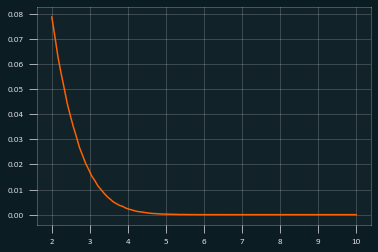

In [5]:
def sample_norm(mean1=0,std1=1,mean2=0,std2=1,size=1000000):
    a=np.random.normal(mean1, std1, size)
    b=np.random.normal(mean2, std2, size)
    return np.sum(a>b)/size

std=1
x = np.linspace(2, 10, 100)
y = [sample_norm(0,std,v,std,size=1000000) for v in x]
plt.plot(x,y)
sample_norm(0,std,std*2.328,std,size=1000000)

Une simulation monte carlo nous donne une valeur approximé à **2.328**. Il conviendrait d'utiliser cette valeur pour les études de variations. Das ce cas la marge d'erreur devrait être $$\frac{2.328}{2}\sigma=1.164\sigma$$

In [70]:
def draw_norm_err(m=0,std=1,err=0.05,xmin=0,xmax=7,draw_err=True):

    Za_max=norm.ppf(1-err/2,loc=m,scale=std)
    Za_min=norm.ppf(err/2,loc=m,scale=std)
    x = np.linspace(xmin, xmax, 100)
    y = norm.pdf(x,m,std)
    if draw_err:
        xerr = np.linspace(Za_min, Za_max, 100)
        yerr = norm.pdf(xerr,m,std)
        plt.fill_between(xerr, yerr,alpha=0.2)
    plt.plot(x,y)




# Corrections, modifications et précisions
Ce thread recense les modifications effectuées à l’analyse. Soit parce que je considère qu’elles sont intéressantes à détailler soit parce que je corrige une erreur ou j’explore un point de vue différent sur les données.

Il s’agira d’informations relativement techniques par rapport aux autres threads et qui ne seront donc pas à destination de tout le monde, mais qui me permettent de faire un suivi et aussi, si certains ont envie, de venir me corriger si je fais des erreurs.

Pour initier ce thread, je voudrais donc faire une correction sur mon analyse de pertinence des variations dans les rapports des instituts de sondages. Pour commencer, il faut comprendre que les marges d’erreurs sont calculées par rapport à une loi de probabilité appelée Loi normale ou Gaussienne

## Loi Normale

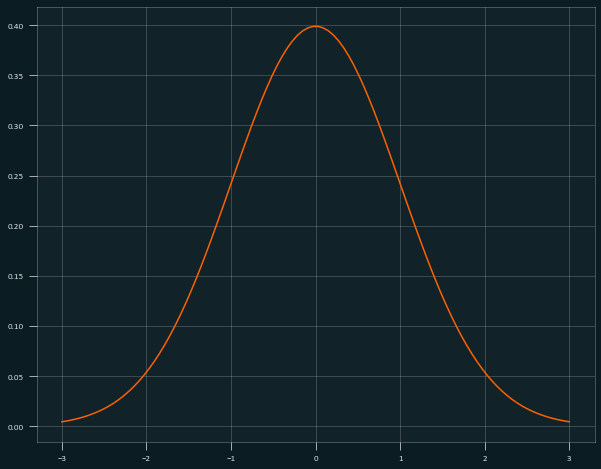

In [10]:
plt.figure(figsize=(10,8))
xmin,xmax=0,7
std=1
m=2
err=0.95
# draw_norm_err(m,std,err,xmin,xmax)
# draw_norm_err(m+2,std,err,xmin,xmax)
draw_norm_err(0,std,err,-3,3,False)
plt.savefig('plots/loi_normale.png',dpi=200)


Il s’agit d’une loi extrêmement connue en probabilité et qui revient régulièrement en probabilité.

Elle apparaît en statistique dans le domaine de l’échantillonnage à cause du Théorème Central Limite ( [https://fr.wikipedia.org/wiki/Th%C3%A9or%C3%A8me_central_limite] ) qui stipule que le tirage aléatoire successifs de variables aléatoires converge vers une loi normale. Cette propriété est intéressante puisque dans le cas d’un échantillonnage, chaque échantillon est une variable aléatoire . Ainsi, avec suffisamment d’échantillon on peut se rapprocher d’une loi normale.

Par exemple : imaginons que nous tirions à pile ou face 100 fois, pile vaut 1 et face -1. Si nous faisons la somme de cent lancés on peut obtenir un nombre entre -100 et 100. Bien sûr certaines valeurs sont plus probables que d’autres. -100 et 100 étant très peu probables car il faut lancer respectivement 100 faces ou 100 piles.

En répétant cette expérience 1000 fois on peut alors représenter graphiquement la fréquence d’apparition de chaque nombre possibles

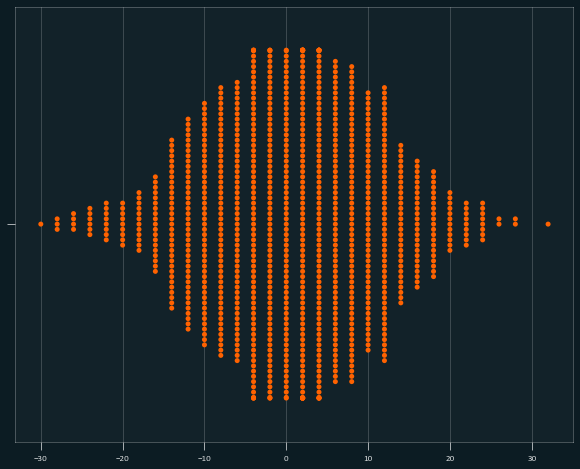

In [31]:
plt.figure(figsize=(10,8))
std=np.sqrt(2*np.pi)
x=np.random.choice([-1,1],(100,1000)).sum(axis=0)
# draw_norm_err(0,1,err,-3,3,False)
sns.swarmplot(x)
plt.savefig('plots/echantillonnage1.png',dpi=200)

On observe que certaines valeurs apparaissent plus souvent que d’autres, notamment autour de 0. Cela est normal puisque d’après le théorème central limite, cet échantillonnage est sensé tendre vers une loi normale.

Cela se voit d’ailleurs très bien dès que l’on trace une loi normale par dessus (la somme à été divisée par 10 pour être du même ordre de grandeur que le tracé de la loi normale, mais cela ne change rien au propos)

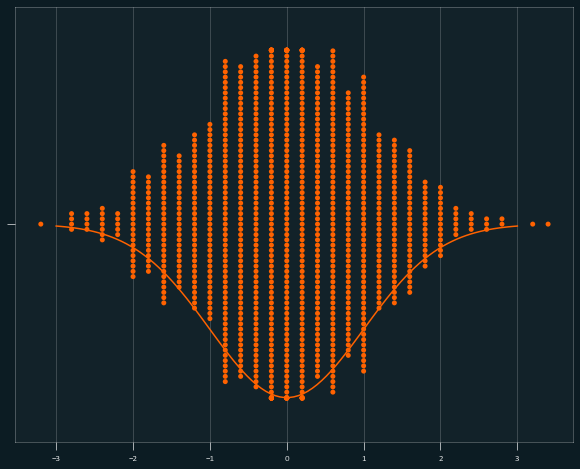

In [12]:
plt.figure(figsize=(10,8))
std=np.sqrt(2*np.pi)
x=np.random.choice([-1,1],(100,1000)).sum(axis=0)/10
draw_norm_err(0,1,err,-3,3,False)
sns.swarmplot(x)
plt.savefig('plots/echantillonnage2.png',dpi=200)

## Échantillonnage
Dans le cas d’un sondage, le problème est équivalent bien que pris à l’envers. On suppose qu’il existe une probabilité d’appartenir à un groupe ou un autre dans une population entière. Cette probabilité est en fait la fréquence d’apparition des éléments des différents groupes dans la population entière. Par exemple, il y a 54 % de femmes et 46 % d’hommes en France. En tirant aléatoirement 1000 francais.es au hasard et comptez le nombre de femmes, ce nombre sera proche de 540 (54 % de 1000). Il peut y avoir des variations mais qui sont contraint par le théorème central limite et la loi normale.

Si je réitère cette expérience 1000 fois, cela apparaît très clairement comme pour le lancé de pièces. Le nombre de femmes estimé est compris entre 490 et 600 avec une moyenne autour de 540.

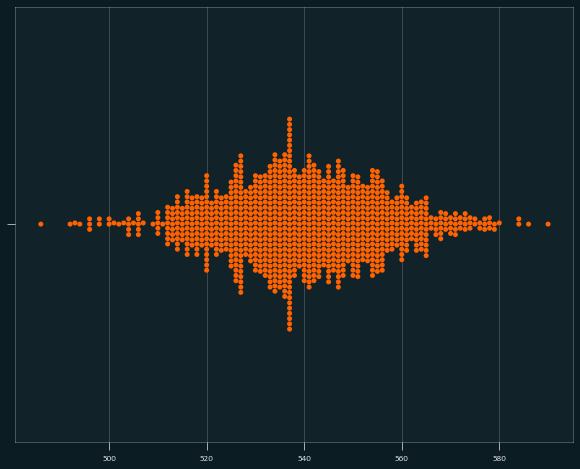

In [41]:
plt.figure(figsize=(10,8))
std=np.sqrt(2*np.pi)
x=np.random.choice([0,1],(1000,1000),p=[0.46,0.54]).sum(axis=0)
# draw_norm_err(0,1,err,-3,3,False)
sns.swarmplot(x)
plt.savefig('plots/femmes.png',dpi=200)


Cela veut donc dire que l’on peut estimer la fréquence d’appartenance à un groupe dans une population de plusieurs millions d’habitant avec un faible nombre d’individus tirés au hasard. Néanmoins, on remarque aussi que parfois le tirage aléatoire se « passe mal » avec des valeurs assez loin de la réalité : les cas aux extrêmes.

Heureusement, grâce au TCL (Théorème centrale limite) et à la loi normale on peut garantir un certain nombre de propriétés.

## Propriétés de la loi normale
Une des propriétés intéressantes est le rapport entre l’écart à la moyenne (à proportion des valeurs considérées) et la proportions des résultats possibles d’une succession de tirage aléatoire. Par exemple, la moyenne des écarts à la moyenne (aka l’écart-type) englobe toujours les 2/3 des résultats possibles. Dans le cas d’exemple du nombre de femmes, un écart de 12 par rapport à la moyenne représente 2/3 des échantillons.

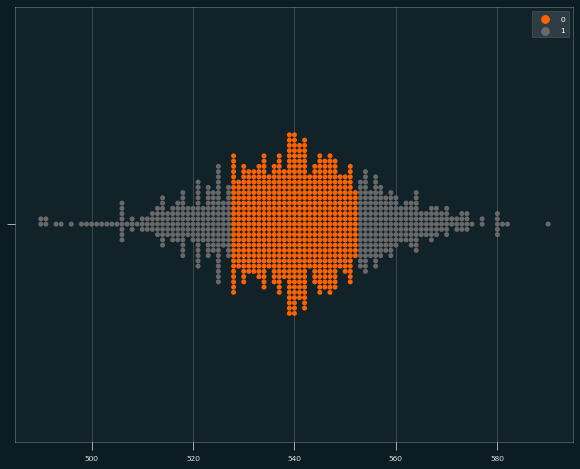

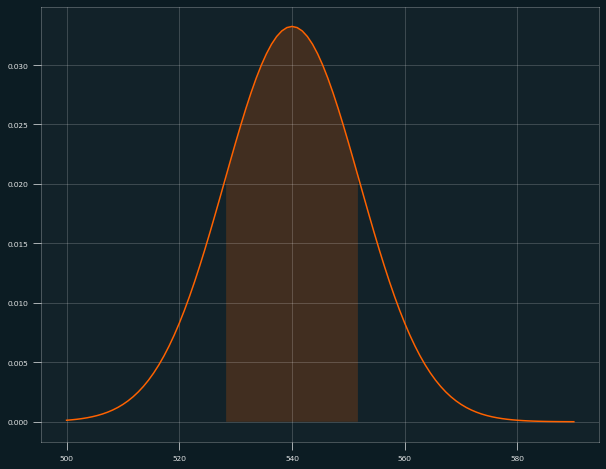

In [76]:
plt.figure(figsize=(10,8))
std=np.sqrt(2*np.pi)
x=np.random.choice([0,1],(1000,1000),p=[0.46,0.54]).sum(axis=0)
std_femmes=(np.abs(x-x.mean())).mean()
t=[0 if np.abs(v-x.mean())<std_femmes and v+x.mean()>std_femmes else 1 for v in x ]
sns.swarmplot(x, y=[""]*len(x),hue=t)
plt.savefig('plots/femmes_ecart.png',dpi=200)

plt.figure(figsize=(10,8))
xmin,xmax=500,590
std=12
m=540
err=0.33
draw_norm_err(m,std,err,xmin,xmax)
plt.savefig('plots/femmes_normale.png',dpi=200)


Par conséquence, il est possible de choisir un écart qui englobera toujours la même proportion de résultats. D’un point de vue de l’échantillonnage, cela veut dire que vous pouvez choisir un intervalle d’erreur (un écart à la moyenne) qui garantisse qu’un résultat soit dans cet intervalle avec une probabilité fixe.

## Estimation par un échantillon
Les instituts de sondages se reposent donc sur ces propriétés et théorèmes pour estimer les proportions de différents groupes dans une population. Ce faisant, il font leur échantillonnage de 1000 personnes et grâce au TCL, ils savent que leur résultat est quelque part sous la courbe de la loi normale associée : sans doute proche de la valeur réelle, mais potentiellement aussi aux extrêmes.

Hors, comme nous venons de le voir, il est possible de définir un écart à la moyenne (c’est-à-dire une marge d’erreur autour de la valeur réelle) qui garantisse que l’échantillonnage s’y trouve avec une certaine probabilité.

En général, les instituts de sondage prennent une valeur de confiance à 95 %, c’est-à-dire que les résultats obtenus ont 95 % de chance d’être dans l’intervalle associé.

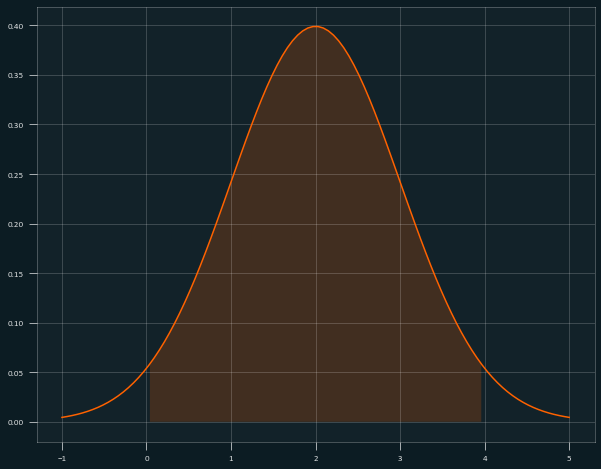

In [80]:
plt.figure(figsize=(10,8))
xmin,xmax=-1,5
std=1
m=2
err=0.05
draw_norm_err(m,std,err,xmin,xmax)
plt.savefig('plots/l_normale_95.png',dpi=200)

Si vous avez bien suivi, vous voyez que plus la valeur de confiance est élevée plus l’intervalle est grand (plus vous voulez que votre échantillon soit dans un intervalle d’erreur, plus vous devez agrandir cet intervalle).

## Une petite précision sur l’erreur d’un échantillon
Notez que jusqu’à présent, j’ai défini la valeur réelle comme étant la moyenne de notre loi normale, hors, en réalité, cette valeur n’est pas connue (c’est d’ailleurs pour cela que l’on fait un sondage). On va donc placer l’intervalle d’erreur autour de la valeur expérimentale puisque la probabilité d’erreur d’échantillonnage est dépendante de la distance à la valeur réelle. Hors cette distance est la même que l’on parte de la valeur réelle ou de la valeur estimée.

Exemple ci dessous la valeur réelle est 0 et la valeur estimée est deux. Que la courbe de distribution soit centrée sur la valeur observée ou la valeur réelle, la probabilité est la même.

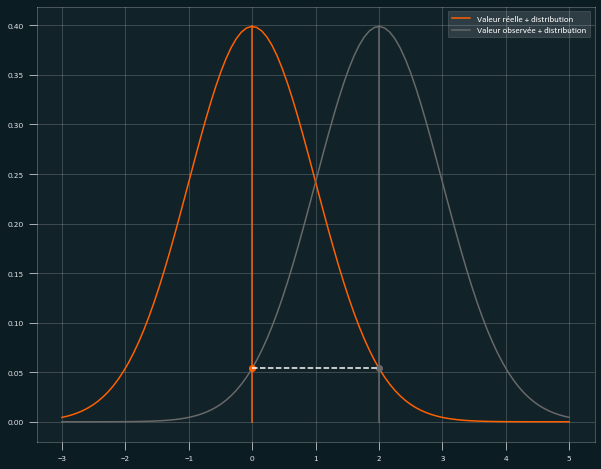

In [122]:
plt.figure(figsize=(10,8))
xmin,xmax=-3,5
std=1
m=0
draw_norm_err(m,std,err,xmin,xmax,False)
real_color=plt.gca().lines[-1].get_color()
draw_norm_err(m+2,std,err,xmin,xmax,False)
obs_color=plt.gca().lines[-1].get_color()
plt.legend(['Valeur réelle + distribution',"Valeur observée + distribution"])
plt.plot([0,0],[0,norm.pdf(0,m,std)],color=real_color,)
plt.plot([2,2],[0,norm.pdf(2,m+2,std)],color=obs_color,)
plt.plot([2],[norm.pdf(2,m,std)],'o',color=obs_color,markersize=6)
plt.plot([0],[norm.pdf(2,m,std)],'o',color=real_color,markersize=6)
plt.plot([0,2],[norm.pdf(2,m,std),norm.pdf(2,m,std)],linestyle='--',color='white')
plt.savefig('plots/reelle_estime.png',dpi=200)